# 목표

### 1) 서울시 구별 인구수와 CCTV 설치 비율에 대한 분석을 위해 공공데이터를 확인하고 적절한 방법으로 처리 
### 2) 최근 3년간 CCTV증가율과 한국인, 외국인, 고령자의 비율에 따른 데이터 변화를 파악

# 1. 데이터 불러오고 구조파악하기

### [서울인구통계] [서울시 CCTV] 파일 불러오기

두 데이터를 merge하기 위해서 index로 사용할 데이터를 살펴보았다.

두 데이터에 공통으로 존재하는 정보는 **자치구, 기간**이다.

In [1]:
import pandas as pd
import numpy as np

dir_ ='/Users/dasol/Documents/GitHub/Big-Data-Analysis/POSCO_classnote/'
dir_ = dir_+'02.BigData분석/dataHandling-main/data/'

pop_seoul = pd.read_csv(dir_+'서울인구통계.txt',sep="\t", engine="python", thousands = ",", encoding = "utf-8")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.3/4,합계,4405833,9953009,4840912,5112097,9699232,4719170,4980062,253777,121742,132035,2.2,1552356
3,2020.3/4,종로구,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2,28396
4,2020.3/4,중구,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265


In [2]:
cctv_seoul=pd.read_excel(dir_+"서울시cctv.xlsx")
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


# 2.총 계, 한국인, 외국인, 고령자의 인구 수 가져오기
###  2-1.column name을 담고있는 1st, 2nd row 삭제

In [3]:
pop1=pop_seoul[["자치구","인구","인구.3","인구.6","65세이상고령자"]]
pop_seoul=pop1.drop([0,1]) # column name을 담고있는 1st, 2nd row 삭제
pop_seoul.head()

,자치구,인구,인구.3,인구.6,65세이상고령자
2,합계,9953009,9699232,253777,1552356
3,종로구,159842,149952,9890,28396
4,중구,135321,125800,9521,24265
5,용산구,244953,229786,15167,39995
6,성동구,302695,295591,7104,45372


###  2-2.컬럼명 변경

In [4]:
pop_seoul.rename(columns={
    pop_seoul.columns[0]:"자치구",
    pop_seoul.columns[1]:"총계",
    pop_seoul.columns[2]:"한국인",
    pop_seoul.columns[3]:"외국인",
    pop_seoul.columns[4]:"고령자"},inplace=True)
pop_seoul.head()

,자치구,총계,한국인,외국인,고령자
2,합계,9953009,9699232,253777,1552356
3,종로구,159842,149952,9890,28396
4,중구,135321,125800,9521,24265
5,용산구,244953,229786,15167,39995
6,성동구,302695,295591,7104,45372


In [5]:
cctv_seoul.rename(columns={cctv_seoul.columns[0] : "자치구"}, inplace=True)
cctv_seoul.rename(columns={cctv_seoul.columns[1] : "cctv수"}, inplace=True) # inplace=TRUE로 해야 값까지 다 포함해서 가져감
cctv_seoul.head() 

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


# 3. 결측치/이상치 확인
1) info(): cctv 데이터의 2011년 이전, 2012, 2013 column 데이터 개수가 작은 것을 파악

2) nan 값이 있는 데이터 확인
    - 동대문구, 중랑구의 경우 2013년까지 데이터가 존재하지 않았다.=> 데이터 제거 결정

In [6]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       25 non-null     object 
 1   cctv수     25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [7]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     26 non-null     object
 1   총계      26 non-null     object
 2   한국인     26 non-null     object
 3   외국인     26 non-null     object
 4   고령자     26 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [8]:
cctv_seoul.isnull().sum()

자치구         0
cctv수       0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

### 결측치가 있는 데이터 row 확인

In [9]:
cctv_seoul.loc[cctv_seoul.isnull()['2011년 이전']]

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


In [10]:
cctv_seoul.loc[cctv_seoul.isnull()['2012년']]

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


In [11]:
cctv_seoul.loc[cctv_seoul.isnull()['2013년']]

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


### 결측치 있는 row 제거

In [12]:
cctv_seoul.dropna(axis=0, inplace=True)
cctv_seoul

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


# 4. 한국인, 외국인, 고령자의 비율 계산

### 비율 계산에 오류 발생으로 series 데이터 type 확인
object 타입이므로 정수형으로 변환

In [13]:
pop_seoul['한국인']

2     9699232
3      149952
4      125800
5      229786
6      295591
7      348064
8      344416
9      395997
10     439719
11     309996
12     327248
13     525486
14     481546
15     313212
16     373508
17     456240
18     583544
19     405579
20     232157
21     375630
22     393554
23     498574
24     426009
25     539235
26     670331
27     458058
Name: 한국인, dtype: object

In [14]:
pop_seoul=pop_seoul.astype({"총계":'int',"한국인":'int',"외국인":'int',"고령자":'int'})

In [15]:
pop_seoul['한국인 비율'] = pop_seoul['한국인']/pop_seoul['총계']*100

In [16]:
pop_seoul['외국인 비율'] = pop_seoul['외국인']/pop_seoul['총계']*100

In [17]:
pop_seoul['고령자 비율'] = pop_seoul['고령자']/pop_seoul['총계']*100

In [18]:
pop_seoul.head()

,자치구,총계,한국인,외국인,고령자,한국인 비율,외국인 비율,고령자 비율
2,합계,9953009,9699232,253777,1552356,97.450248,2.549752,15.596851
3,종로구,159842,149952,9890,28396,93.812640,6.187360,17.765043
4,중구,135321,125800,9521,24265,92.964137,7.035863,17.931437
5,용산구,244953,229786,15167,39995,93.808200,6.191800,16.327622
6,성동구,302695,295591,7104,45372,97.653083,2.346917,14.989346


In [19]:
cctv_seoul.head()

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


# 5. 최근 3년간 CCTV증가율 계산
데이터가 2018년까지 있으므로, 최근 3년을 2016, 2017, 2018로 삼았습니다.

증감율의 정의가 "(비교연도 - 기준연도)/기준연도 * 100"이므로 

최근 3년간 증가율 =  2016년 이후로 증감한 개수 /2016년 당시 총 개수

라고 해석하였습니다.

따라서, 최근 3년간 증가율 =  (2016 개수+ 2017개수+ 2018개수)/ (2018 기준 총 개수 - 2016 개수- 2017개수- 2018개수)* 100

으로 정의하고 계산하였습니다.

In [31]:
cctv_seoul["증가율"]=(cctv_seoul["2018년"]+cctv_seoul["2017년"]+cctv_seoul["2016년"])/(cctv_seoul["cctv수"]-(cctv_seoul["2018년"]+cctv_seoul["2017년"]+cctv_seoul["2016년"]))*100

# 6. 데이터 병합
cctv_seoul의 자치구 데이터를 기준으로 병합하기 위해 형태를 변환

In [27]:
cctv_seoul["자치구"]=["강남구","강동구","강북구","강서구","관악구","광진구","구로구","금천구","노원구","도봉구",
"동작구","마포구","서대문구","서초구","성동구","성북구","송파구","양천구","영등포구","용산구","은평구",
"종로구","중구"]

In [30]:
result = pd.merge(cctv_seoul, pop_seoul, on="자치구")
result.head()

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,증가율,총계,한국인,외국인,고령자,한국인 비율,외국인 비율,고령자 비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,544085,539235,4850,73942,99.108595,0.891405,13.590156
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,462275,458058,4217,68798,99.087772,0.912228,14.882483
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,313550,309996,3554,62951,98.866528,1.133472,20.076862
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,589536,583544,5992,88052,98.983607,1.016393,14.935814
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,514555,498574,15981,78206,96.894210,3.105790,15.198764


# 7. 해석: cctv 증가율

cctv 증가율이 높은 top3 자치구는 중구, 영등포구, 성동구이며,

히스토그램상으로 보았을 때 평균보다 높은 값임을 확인할 수 있었습니다.

In [32]:
cctv_seoul.sort_values(by="증가율",ascending=False).head(5)

,자치구,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


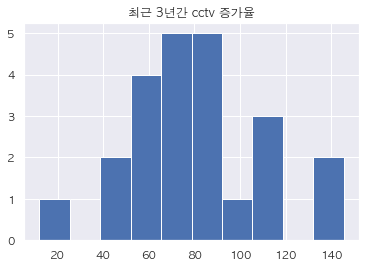

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font="AppleGothic")
plt.rcParams['axes.unicode_minus']=False

plt.hist(list(cctv_seoul['증가율']), bins = 10)
plt.title('최근 3년간 cctv 증가율')
plt.show()  

# 7. 해석: 인구비율
한국인 비율은 대부분(10개) 이상의 자치구가 99%에 근접한 비율을 가진다.

외국인 비율이 높은 자치구(영등포, 중구, 금천구 등)은 개수가 적다.

고령자 비율이 높은 자치구(강북구, 도봉구, 중구 등) 또한 개수가 적다.

이러한 **현상을 봤을 때 특이성을 가지는 변수는 외국인 비율과 고령자 비율일 것이라고 추측**하였습니다.

가설을 확인하기 위해 scatter plot을 그려보았습니다.

추가적으로 상관계수 분석을 실행하면 좋을 것 같습니다.

In [33]:
pop_seoul.sort_values(by="한국인 비율",ascending=False).head(5)

,자치구,총계,한국인,외국인,고령자,한국인 비율,외국인 비율,고령자 비율
12,도봉구,329300,327248,2052,61388,99.376860,0.623140,18.641968
13,노원구,529532,525486,4046,84612,99.235929,0.764071,15.978638
17,양천구,460048,456240,3808,64804,99.172260,0.827740,14.086356
14,은평구,485842,481546,4296,84353,99.115762,0.884238,17.362229
25,강남구,544085,539235,4850,73942,99.108595,0.891405,13.590156


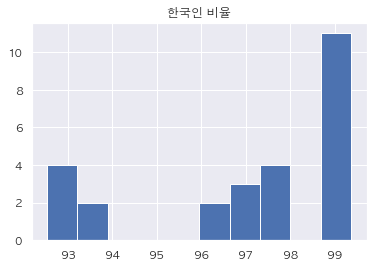

In [40]:
plt.hist(list(pop_seoul['한국인 비율']), bins = 10)
plt.title('한국인 비율')
plt.show()  

In [34]:
pop_seoul.sort_values(by="외국인 비율",ascending=False).head(5)

,자치구,총계,한국인,외국인,고령자,한국인 비율,외국인 비율,고령자 비율
21,영등포구,405982,375630,30352,60826,92.523806,7.476194,14.982438
4,중구,135321,125800,9521,24265,92.964137,7.035863,17.931437
20,금천구,249641,232157,17484,39361,92.996343,7.003657,15.767041
19,구로구,435751,405579,30172,69312,93.075862,6.924138,15.906332
5,용산구,244953,229786,15167,39995,93.808200,6.191800,16.327622


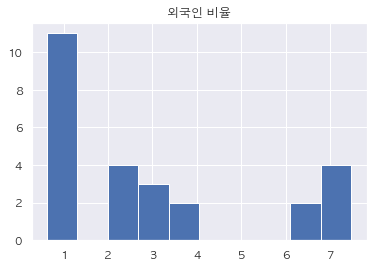

In [41]:
plt.hist(list(pop_seoul['외국인 비율']), bins = 10)
plt.title('외국인 비율')
plt.show() 

In [35]:
pop_seoul.sort_values(by="고령자 비율",ascending=False).head(5)

,자치구,총계,한국인,외국인,고령자,한국인 비율,외국인 비율,고령자 비율
11,강북구,313550,309996,3554,62951,98.866528,1.133472,20.076862
12,도봉구,329300,327248,2052,61388,99.376860,0.623140,18.641968
4,중구,135321,125800,9521,24265,92.964137,7.035863,17.931437
3,종로구,159842,149952,9890,28396,93.812640,6.187360,17.765043
14,은평구,485842,481546,4296,84353,99.115762,0.884238,17.362229


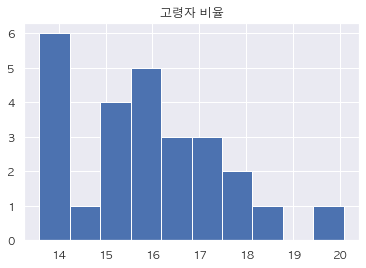

In [42]:
plt.hist(list(pop_seoul['고령자 비율']), bins = 10)
plt.title('고령자 비율')
plt.show() 

# 8. cctv 증가율에 영향을 미칠 것으로 추측한 변수의 상관관계 분석1: 산점도

해석:

예상했던 것처럼 한국인 비율은 상관성이 없는 것으로 보입니다.

외국인 비율, 고령자 비율의 상관성을 예측하기에는 데이터 포인트 수가 작기 때문에 산점도 그래프 만으로는 해석이 불가능했습니다.

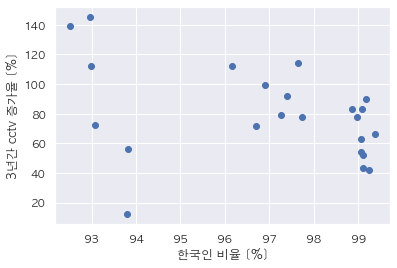

In [50]:
plt.scatter(result['한국인 비율'],result['증가율'])
plt.xlabel("한국인 비율 [%]")
plt.ylabel('3년간 cctv 증가율 [%]')
plt.show()

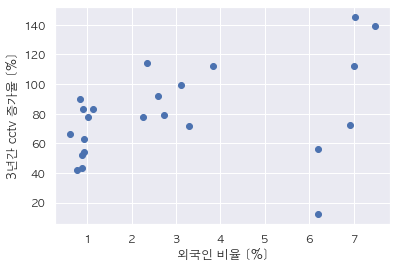

In [47]:
plt.scatter(result['외국인 비율'],result['증가율'])
plt.xlabel("외국인 비율 [%]")
plt.ylabel('3년간 cctv 증가율 [%]')
plt.show()

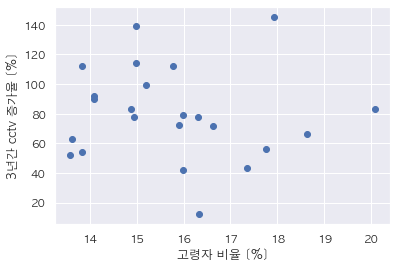

In [49]:
plt.scatter(result['고령자 비율'],result['증가율'])
plt.xlabel("고령자 비율 [%]")
plt.ylabel('3년간 cctv 증가율 [%]')
plt.show()

# 9. cctv 증가율에 영향을 미칠 것으로 추측한 변수의 상관관계 분석2: 상관계수 분석
해석:

상관분석 결과 cctv 증가율과 

한국인 비율의 상관계수는 -0.38, 

외국인 비율의 상관계수는 0.38, 

고령자 비율의 상관계수는 -0.069

따라서 

cctv 증가율과 한국인 비율은 음의 상관관계, 외국인 비율은 양의 상관관계를 가지며 그 정도(절댓값)은 비슷하다는 것을 알 수 있었습니다.

반면 cctv 증가율과 고령자 비율은 음의 상관관계를 가지며, 그 영향이 약 -0.1으로 다른 인구 비율보다 상대적으로 영향이 적다고 해석하였습니다.

In [52]:
df = result[['한국인 비율','증가율']]
df.corr(method='pearson').round(3)

,한국인 비율,증가율
한국인 비율,1.00,-0.38
증가율,-0.38,1.00


In [53]:
df = result[['외국인 비율','증가율']]
df.corr(method='pearson').round(3)

,외국인 비율,증가율
외국인 비율,1.00,0.38
증가율,0.38,1.00


In [54]:
df = result[['고령자 비율','증가율']]
df.corr(method='pearson').round(3)

,고령자 비율,증가율
고령자 비율,1.000,-0.069
증가율,-0.069,1.000
